In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re 
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
%matplotlib inline

from sklearn import linear_model,ensemble, tree, model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn import datasets

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

/Users/home/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [232]:
df = pd.read_csv('final.csv', index_col=0)
x_cols = ['week', 'year', 
       'passratio_last', 'passratio_last_three', 'passratio_last_five',
       'passratio_total_avg', 'touchdowns_last', 'touchdowns_last_three',
       'touchdowns_last_five', 'touchdowns_total_avg', 'avg_yd_last',
       'avg_yd_last_three', 'avg_yd_last_five', 'avg_yd_total_avg',
       'sacks_last', 'sacks_last_three', 'sacks_last_five', 'sacks_total_avg',
       'int_last', 'int_last_three', 'int_last_five', 'int_total_avg',
       'fmbl_last', 'fmbl_last_three', 'fmbl_last_five', 'fmbl_total_avg',
       'won_last', 'won_last_three', 'won_last_five', 'won_total_avg',
       'points_last', 'points_last_three', 'points_last_five',
       'points_total_avg', 'total_penalties_last',
       'total_penalties_last_three', 'total_penalties_last_five',
       'total_penalties_total_avg', 'naughties_last', 'naughties_last_three',
       'naughties_last_five', 'naughties_total_avg', 'super_naughties_last',
       'super_naughties_last_three', 'super_naughties_last_five',
       'super_naughties_total_avg']
df = df.dropna()

y_col = ['interest']

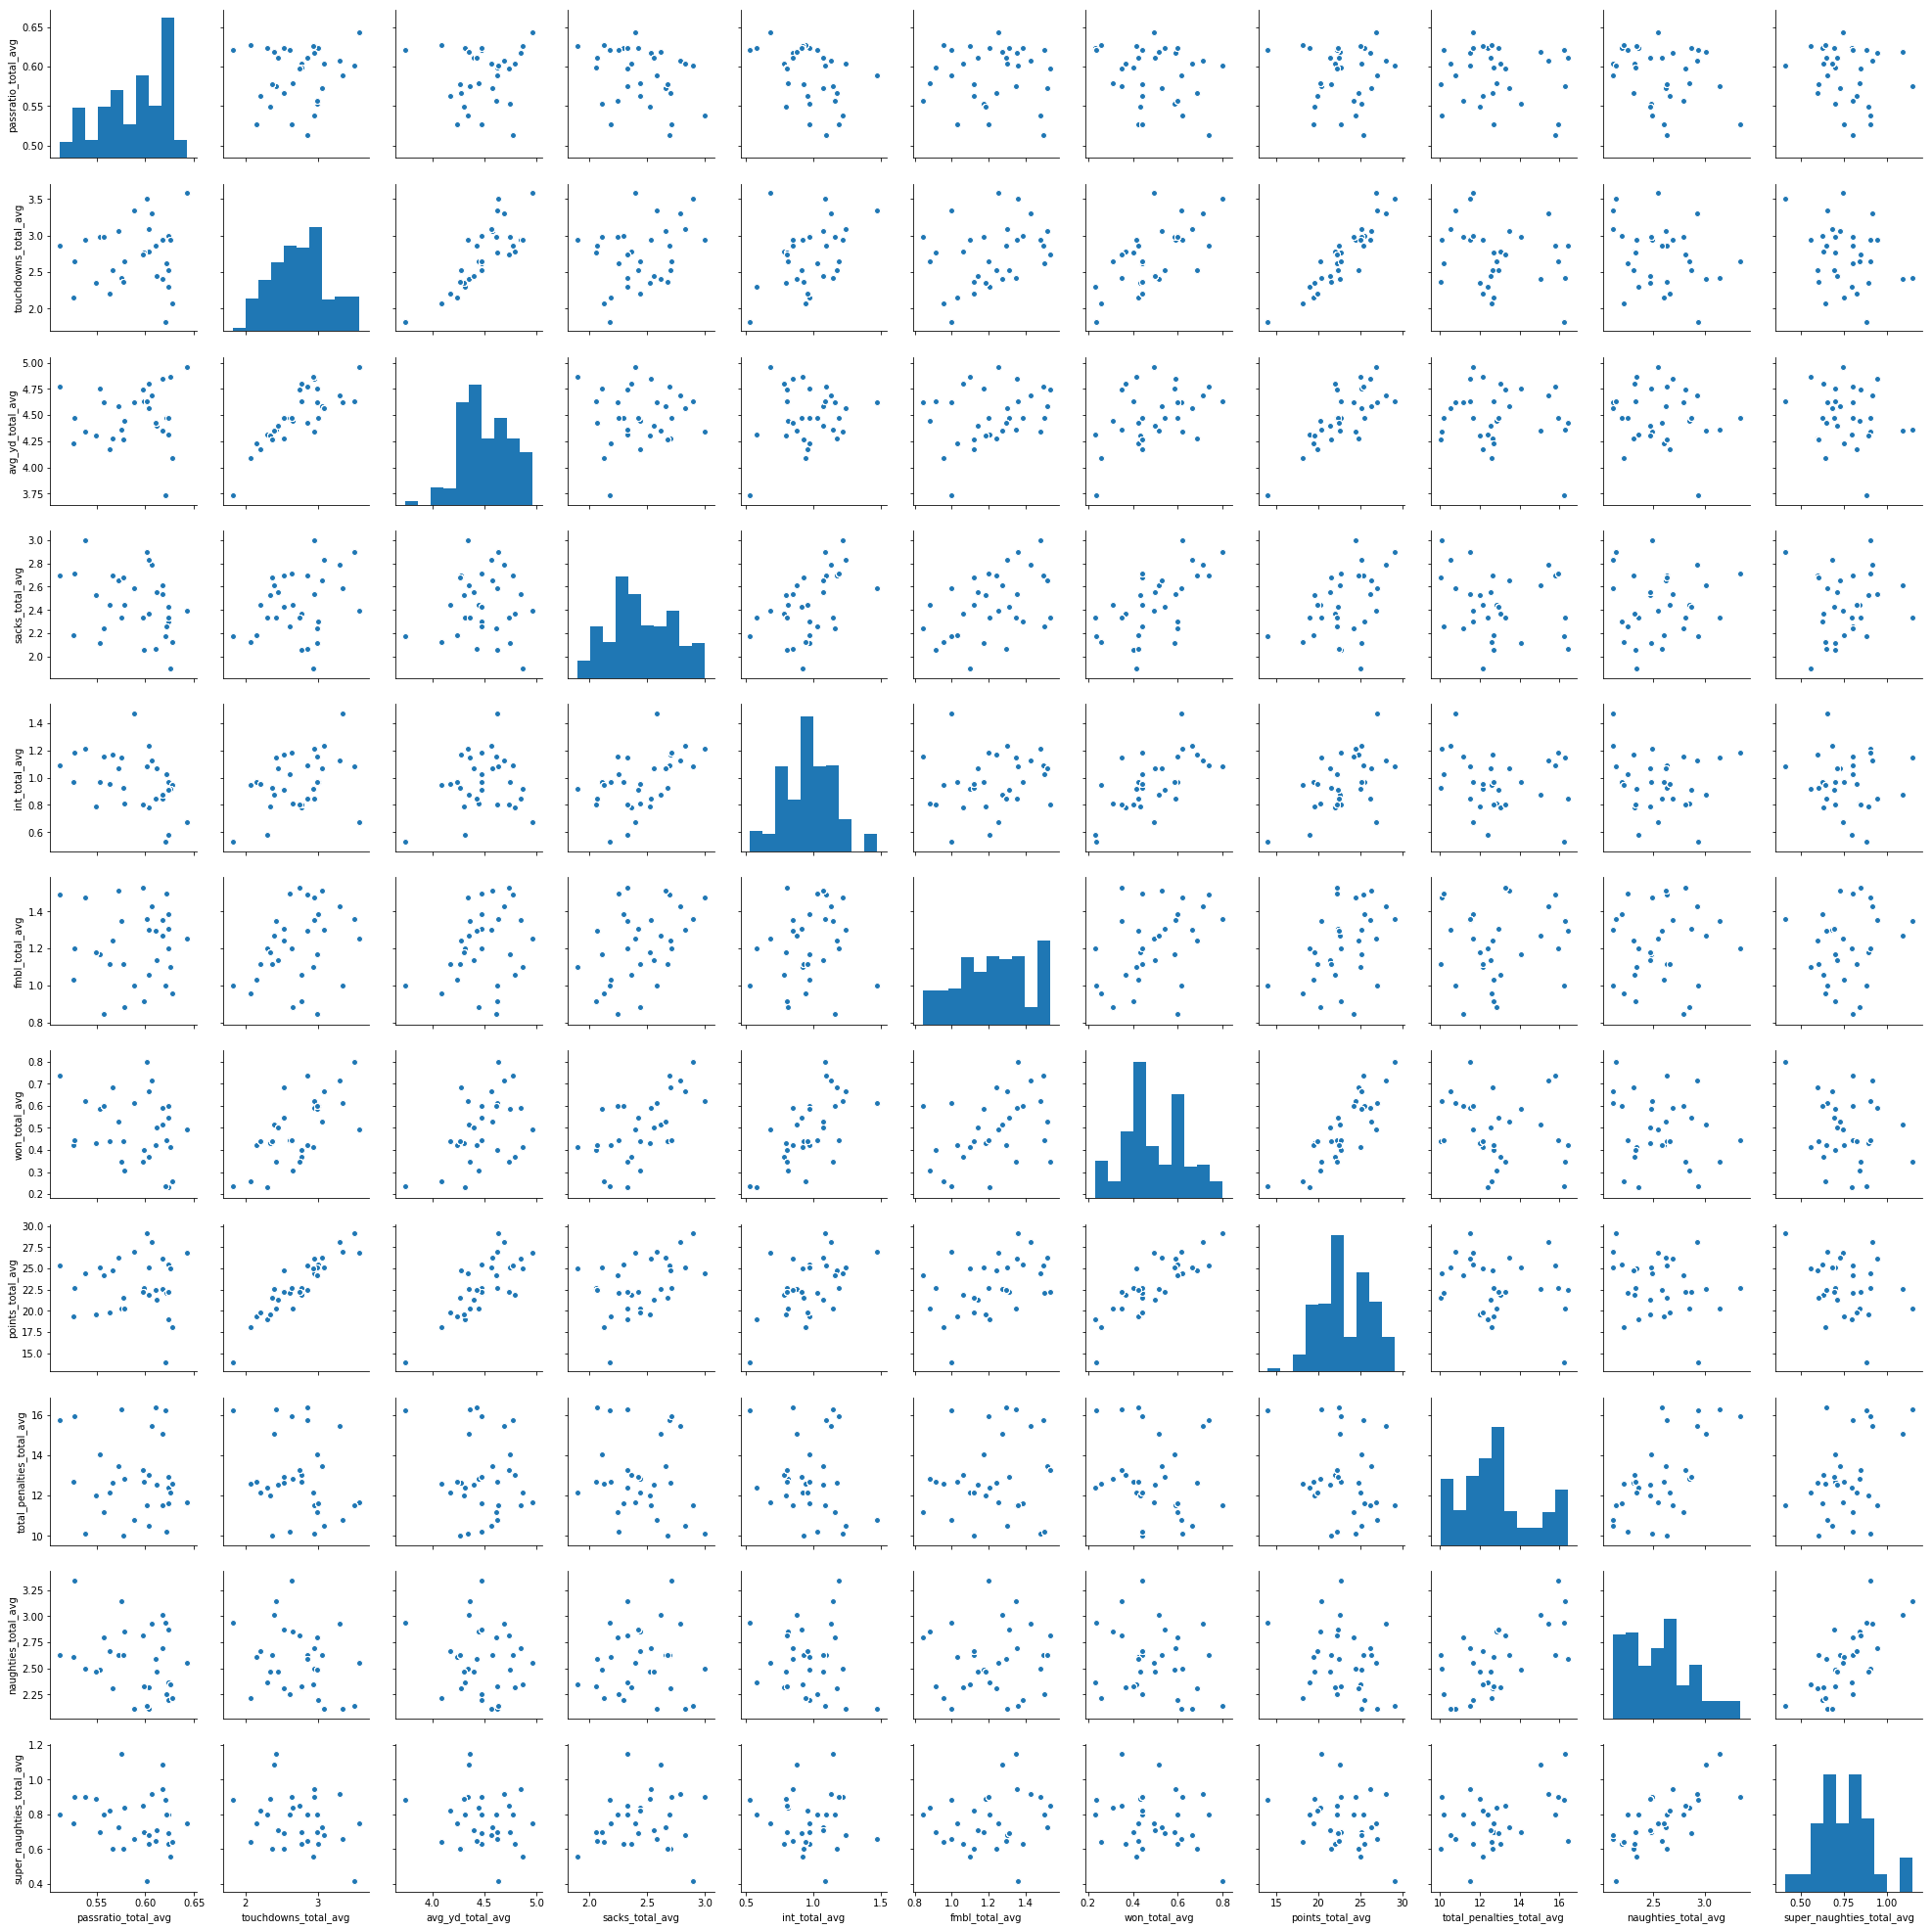

In [296]:
sns.pairplot(df[['passratio_total_avg','touchdowns_total_avg','avg_yd_total_avg','sacks_total_avg','int_total_avg','fmbl_total_avg','won_total_avg','points_total_avg','total_penalties_total_avg','naughties_total_avg','super_naughties_total_avg']])

In [239]:
X = df[x_cols]
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [240]:
std = StandardScaler()
std.fit(X_train)
X_tr = std.transform(X_train)
X_te = std.transform(X_test)

In [241]:
lmodel1 = LinearRegression()
lmodel1.fit(X_tr, y_train)
p = lmodel1.predict(X_te)
r2_score(y_test, p)

0.29613981301055892

<Container object of 10 artists>

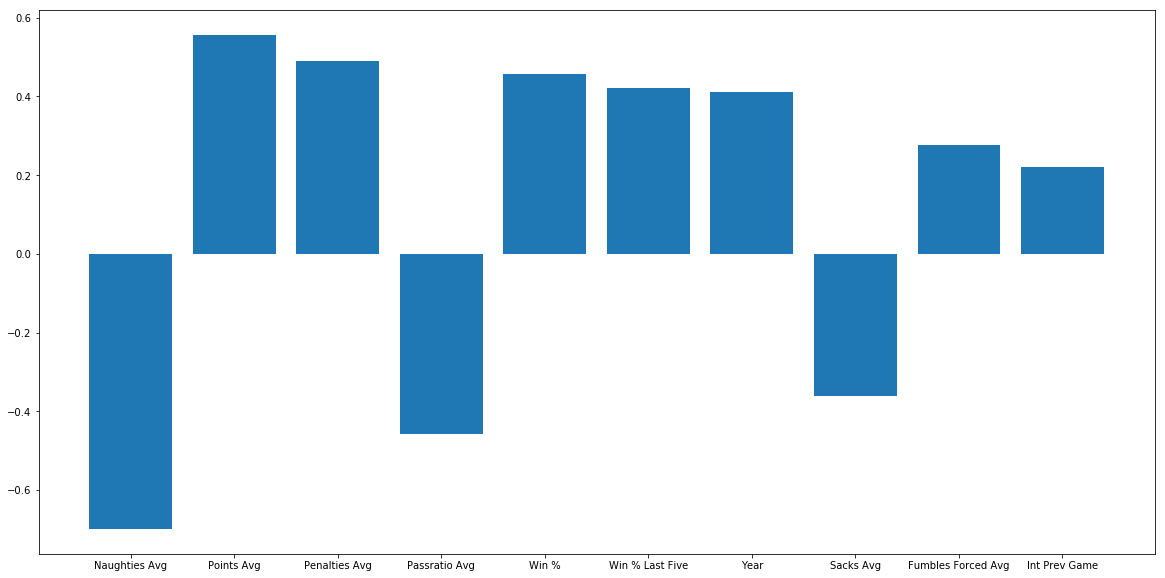

In [286]:
coefs = lmodel1.coef_[0]
z = sorted(zip(x_cols,coefs), key=lambda x: -abs(x[1]))[:10]
labels = ['Naughties Avg', 
          'Points Avg', 
          'Penalties Avg', 
          'Passratio Avg', 
          'Win %', 
          'Win % Last Five', 
          'Year', 'Sacks Avg', 
          'Fumbles Forced Avg',
          'Int Prev Game']
ys = [z_i[1] for z_i in z]
plt.figure(figsize=(20, 10))
plt.bar(range(10), ys, tick_label=labels, )

In [243]:
#Trying out alphas for the Lasso model

for a in np.logspace(-7, 0, 10):
    m = linear_model.Lasso(alpha=a)
    m.fit(X_tr, y_train)
    p = m.predict(X_te)
    print(a, r2_score(y_test, p))

1e-07 0.296139906962
5.99484250319e-07 0.296140376268
3.5938136638e-06 0.296143189207
2.15443469003e-05 0.296160039383
0.000129154966501 0.296260111804
0.000774263682681 0.296904470058
0.00464158883361 0.300773663644
0.0278255940221 0.315662279029
0.16681005372 0.270422845534
1.0 0.073792299479


In [244]:
best_a = 0.0278255940221
m = linear_model.Lasso(alpha=best_a)
m.fit(X_tr, y_train)
p = m.predict(X_te)
print(r2_score(y_test, p))

sorted(zip(x_cols, m.coef_), key=lambda x: -abs(x[1]))

0.315662279029


[('naughties_total_avg', -0.62276428308408704),
 ('points_total_avg', 0.61376376907197583),
 ('total_penalties_total_avg', 0.45657527134602127),
 ('won_total_avg', 0.43219722170523001),
 ('passratio_total_avg', -0.41295357658074727),
 ('year', 0.40359135510184452),
 ('won_last_five', 0.34610914675999033),
 ('sacks_total_avg', -0.27022415202606787),
 ('fmbl_total_avg', 0.21101443052430433),
 ('int_last_five', -0.14763742580353037),
 ('week', -0.13788016102461129),
 ('avg_yd_total_avg', 0.13700985411944597),
 ('passratio_last_five', -0.11712862664704331),
 ('int_last', 0.10940739497391608),
 ('touchdowns_last_three', 0.10156067951203236),
 ('sacks_last', 0.093090192090027751),
 ('super_naughties_last_three', -0.082472383095331253),
 ('total_penalties_last_five', 0.075946985851833695),
 ('super_naughties_total_avg', -0.074792178580757887),
 ('int_last_three', -0.070094641939068711),
 ('naughties_last_five', 0.066913305817823704),
 ('avg_yd_last', -0.049706280667996434),
 ('touchdowns_tota

In [271]:
parameters = {'max_depth' : [5,6],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split' : [2, 4],
              'n_estimators' : [100, 250, 500]}

    

model = ensemble.RandomForestRegressor()
grid_search = GridSearchCV(model, parameters, n_jobs=-2, verbose=1)
grid_search.fit(X_tr,y_train.values.ravel())

grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-2)]: Done 108 out of 108 | elapsed:   38.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [276]:
f = ensemble.RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=100, min_samples_split=4)
f.fit(X_tr, y_train.values.ravel())
p = f.predict(X_te)
r2_score(y_test, p)

0.52540325324110171

<Container object of 10 artists>

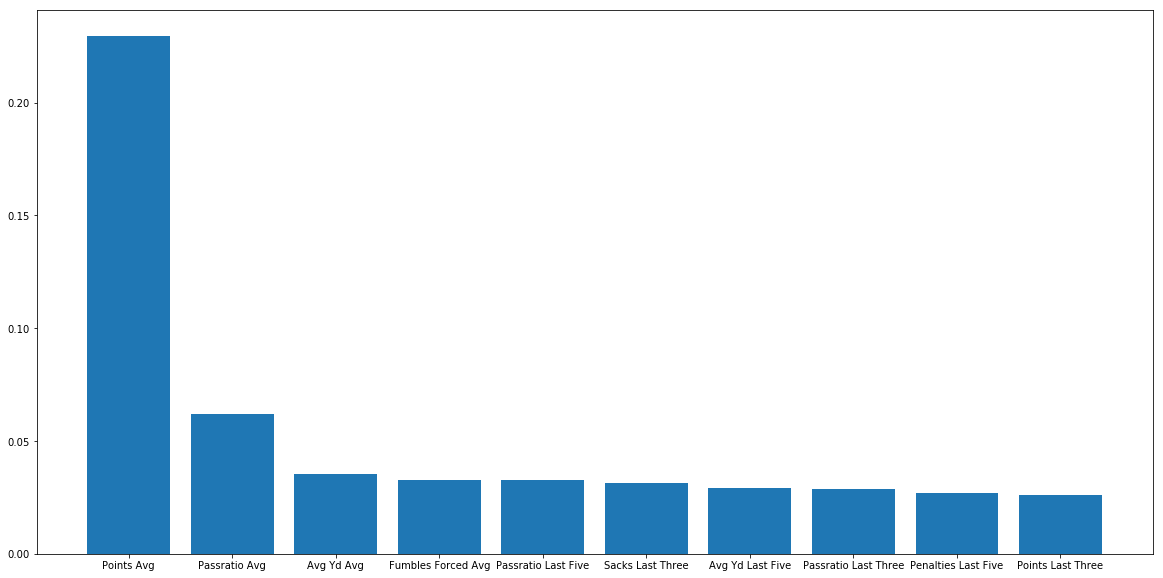

In [303]:
coefs = f.feature_importances_
z = sorted(zip(x_cols,coefs), key = lambda x:-abs(x[1]))[:10]
labels = [x[0].replace('_', ' ').title() for x in z]
ys = [x[1] for x in z]
labels = [x.replace('Total ', '') for x in labels]
labels = ['Points Avg',
         'Passratio Avg',
         'Avg Yd Avg',
         'Fumbles Forced Avg',
         'Passratio Last Five',
         'Sacks Last Three',
         'Avg Yd Last Five',
         'Passratio Last Three',
         'Penalties Last Five',
         'Points Last Three']
plt.figure(figsize=(20,10))
plt.bar(range(10), ys, tick_label=labels)

In [267]:
parameters = {'subsample':np.arange(.1,1,.2),
              'max_depth':[5,6],
              'learning_rate':np.arange(.01,.1,.01),
              'n_estimators':[100, 250, 500]}

model = ensemble.GradientBoostingRegressor()
grid_search = GridSearchCV(model, parameters, n_jobs=-2, verbose=1)
grid_search.fit(X_tr,y_train.values.ravel())

grid_search.best_estimator_

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-2)]: Done 794 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-2)]: Done 810 out of 810 | elapsed:  5.5min finished


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             presort='auto', random_state=None,
             subsample=0.50000000000000011, verbose=0, warm_start=False)

In [274]:
b = ensemble.GradientBoostingRegressor(learning_rate=0.01, n_estimators=250, max_depth=6, subsample=0.5)
b.fit(X_tr, y_train.values.ravel())
p = b.predict(X_te)
r2_score(y_test, p)

0.48071918485083509

In [259]:
coefs = g.feature_importances_
sorted(zip(x_cols,coefs), key = lambda x:-abs(x[1]));